# SDG 7: Urban Electricity Access in Sub-Saharan Africa
## Exploratory Data Analysis Report

---

**Date:** November 2025  
**Scope:** 50 Sub-Saharan African Countries | 1990-2023

---

## What This Report Is About (Plain Language)

This report examines **electricity access in cities and towns (urban areas)** across Sub-Saharan Africa.

**Key Questions:**
- What percentage of city residents have electricity?
- How has urban electricity access changed over time?
- Which countries have the best/worst urban electricity access?

---

## Table of Contents
1. [Data Collection Plan](#1-data-collection)
2. [Data Loading & Cleaning](#2-data-loading)
3. [Summary Statistics](#3-statistics)
4. [Temporal Analysis](#4-temporal)
5. [Country Comparison](#5-countries)
6. [Key Findings](#6-findings)

---
# 1. Data Collection Plan <a id='1-data-collection'></a>

| Attribute | Details |
|-----------|----------|
| **Source** | World Bank - World Development Indicators |
| **Indicator** | EG.ELC.ACCS.UR.ZS |
| **Description** | Access to electricity, urban (% of urban population) |
| **Coverage** | 50 Sub-Saharan African countries |
| **Time Period** | 1990-2023 |
| **License** | CC BY-4.0 |

---
# 2. Data Loading & Cleaning <a id='2-data-loading'></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Define SSA countries
ssa_countries = [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo", "Côte d'Ivoire",
    "Democratic Republic of the Congo", "Djibouti",
    "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Togo", "Tanzania",
    "Uganda", "Zambia", "Zimbabwe"
]

# World Bank to SSA name mapping
wb_to_ssa = {
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Gambia, The": "Gambia",
    "Tanzania": "Tanzania"
}

print(f"Target SSA countries: {len(ssa_countries)}")

Target SSA countries: 49


In [3]:
# Load Urban Electricity Data
df_raw = pd.read_csv('../csv/API_EG.ELC.ACCS.UR.ZS_DS2_en_csv_v2_252729.csv', skiprows=4)
print(f"Raw Data Shape: {df_raw.shape}")
print(f"\nColumns: {df_raw.columns[:10].tolist()}...")

Raw Data Shape: (266, 70)

Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']...


In [4]:
# Process data to long format
year_cols = [str(y) for y in range(1990, 2024)]
available_years = [y for y in year_cols if y in df_raw.columns]

# Select and melt
df_long = df_raw[['Country Name', 'Country Code'] + available_years].melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=available_years,
    var_name='Year',
    value_name='Urban_Electricity'
)
df_long['Year'] = df_long['Year'].astype(int)

# Standardize country names and filter to SSA
df_long['Country Name'] = df_long['Country Name'].replace(wb_to_ssa)
df_ssa = df_long[df_long['Country Name'].isin(ssa_countries)].copy()
df_ssa = df_ssa.rename(columns={'Country Name': 'Country'})

print(f"SSA Data Shape: {df_ssa.shape}")
print(f"Countries: {df_ssa['Country'].nunique()}")
print(f"Years: {df_ssa['Year'].min()} - {df_ssa['Year'].max()}")

SSA Data Shape: (1632, 4)
Countries: 48
Years: 1990 - 2023


In [5]:
# Data quality check
print("=" * 50)
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

total_rows = len(df_ssa)
missing = df_ssa['Urban_Electricity'].isna().sum()
print(f"\nTotal data points: {total_rows}")
print(f"Missing values: {missing} ({missing/total_rows*100:.1f}%)")
print(f"Valid values: {total_rows - missing}")

# Missing by country
missing_by_country = df_ssa.groupby('Country')['Urban_Electricity'].apply(lambda x: x.isna().sum())
print(f"\nCountries with most missing data:")
print(missing_by_country.sort_values(ascending=False).head(10))

DATA QUALITY ASSESSMENT

Total data points: 1632
Missing values: 276 (16.9%)
Valid values: 1356

Countries with most missing data:
Country
Liberia                             17
Angola                              10
Democratic Republic of the Congo    10
South Sudan                         10
Sierra Leone                        10
Sao Tome and Principe               10
Mauritania                          10
Guinea-Bissau                       10
Gabon                               10
Ethiopia                            10
Name: Urban_Electricity, dtype: int64


In [6]:
# Export clean dataset
df_ssa.to_csv('../csv/ssa_urban_electricity_clean.csv', index=False)
print("Clean dataset saved: ssa_urban_electricity_clean.csv")

Clean dataset saved: ssa_urban_electricity_clean.csv


---
# 3. Summary Statistics <a id='3-statistics'></a>

### What Are Summary Statistics? (Plain Language)

Summary statistics give us a quick overview of the data:
- **Mean (Average)**: Add up all values and divide by how many there are
- **Median**: The middle value when sorted (half above, half below)
- **Std (Standard Deviation)**: How spread out the values are from the average
- **Min/Max**: The smallest and largest values

In [7]:
# Overall statistics
print("=" * 50)
print("URBAN ELECTRICITY ACCESS - SUMMARY STATISTICS")
print("=" * 50)

df_valid = df_ssa.dropna(subset=['Urban_Electricity'])
print("\n--- All Years Combined ---")
print(df_valid['Urban_Electricity'].describe())

URBAN ELECTRICITY ACCESS - SUMMARY STATISTICS

--- All Years Combined ---
count    1356.000000
mean       64.173281
std        24.174339
min         3.500000
25%        46.200000
50%        67.450000
75%        84.800000
max       100.000000
Name: Urban_Electricity, dtype: float64


In [8]:
# Statistics by decade
df_valid['Decade'] = (df_valid['Year'] // 10) * 10
decade_stats = df_valid.groupby('Decade')['Urban_Electricity'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print("\n--- Statistics by Decade ---")
print(decade_stats.round(1))


--- Statistics by Decade ---
        mean  median   std   min    max  count
Decade                                        
1990    53.9    46.9  25.6   7.7  100.0    211
2000    57.7    56.4  23.8   3.5  100.0    473
2010    69.3    73.2  21.6   4.0  100.0    480
2020    78.7    83.8  18.9  14.6  100.0    192


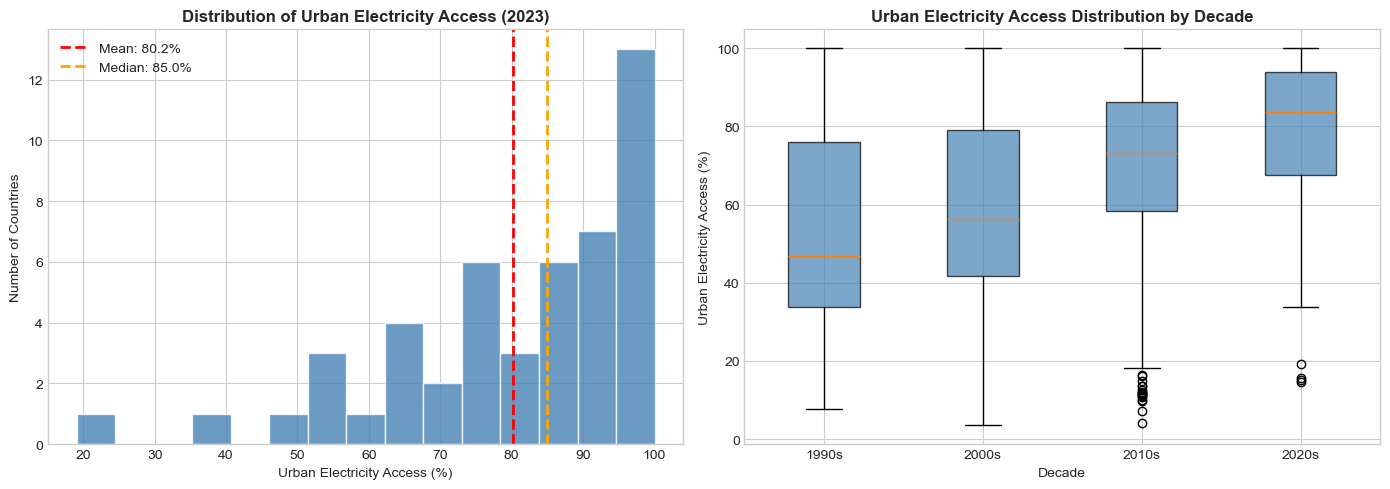

In [9]:
# Distribution visualization
latest_year = df_valid['Year'].max()
df_latest = df_valid[df_valid['Year'] == latest_year]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(df_latest['Urban_Electricity'].dropna(), bins=15, color='steelblue', edgecolor='white', alpha=0.8)
ax1.axvline(df_latest['Urban_Electricity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_latest["Urban_Electricity"].mean():.1f}%')
ax1.axvline(df_latest['Urban_Electricity'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df_latest["Urban_Electricity"].median():.1f}%')
ax1.set_xlabel('Urban Electricity Access (%)')
ax1.set_ylabel('Number of Countries')
ax1.set_title(f'Distribution of Urban Electricity Access ({latest_year})', fontweight='bold')
ax1.legend()

# Box plot by decade
ax2 = axes[1]
decade_data = [df_valid[df_valid['Decade'] == d]['Urban_Electricity'].dropna() for d in sorted(df_valid['Decade'].unique())]
bp = ax2.boxplot(decade_data, labels=[f"{int(d)}s" for d in sorted(df_valid['Decade'].unique())], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('steelblue')
    patch.set_alpha(0.7)
ax2.set_xlabel('Decade')
ax2.set_ylabel('Urban Electricity Access (%)')
ax2.set_title('Urban Electricity Access Distribution by Decade', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/urban_elec_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### What These Charts Show (Plain Language)

**Left Chart - Histogram:**
- Each bar shows how many countries have urban electricity access in that range
- The red dashed line is the average
- The orange dashed line is the median (middle value)

**Right Chart - Box Plots by Decade:**
- Each box shows the distribution for that decade
- If boxes move upward over time, urban electricity access is improving

---
# 4. Temporal Analysis <a id='4-temporal'></a>

### What is Temporal Analysis? (Plain Language)

Temporal analysis looks at how things change **over time**. We want to see:
- Is urban electricity access increasing or decreasing?
- How fast is it changing?

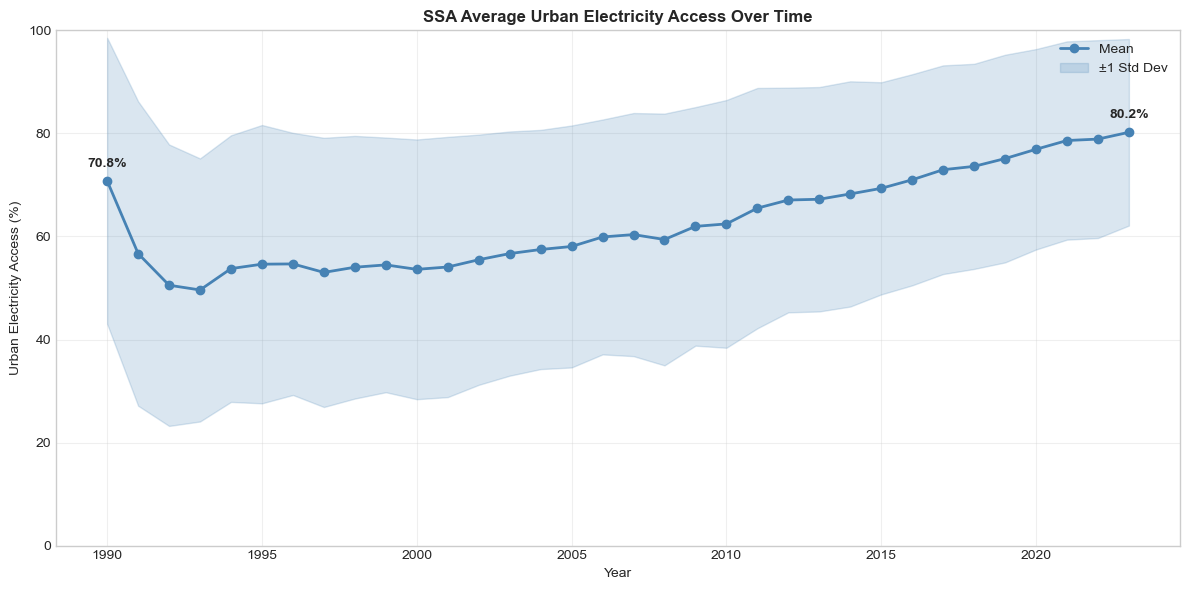


Change from 1990 to 2023: 70.8% → 80.2% (+9.4 percentage points)


In [10]:
# SSA average over time
yearly_avg = df_valid.groupby('Year')['Urban_Electricity'].agg(['mean', 'median', 'std', 'count']).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(yearly_avg['Year'], yearly_avg['mean'], marker='o', linewidth=2, color='steelblue', label='Mean')
ax.fill_between(yearly_avg['Year'], 
                yearly_avg['mean'] - yearly_avg['std'], 
                yearly_avg['mean'] + yearly_avg['std'], 
                alpha=0.2, color='steelblue', label='±1 Std Dev')

ax.set_xlabel('Year')
ax.set_ylabel('Urban Electricity Access (%)')
ax.set_title('SSA Average Urban Electricity Access Over Time', fontweight='bold')
ax.legend()
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)

# Add annotations
first_year = yearly_avg['Year'].min()
last_year = yearly_avg['Year'].max()
first_val = yearly_avg[yearly_avg['Year'] == first_year]['mean'].values[0]
last_val = yearly_avg[yearly_avg['Year'] == last_year]['mean'].values[0]

ax.annotate(f'{first_val:.1f}%', (first_year, first_val), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')
ax.annotate(f'{last_val:.1f}%', (last_year, last_val), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/urban_elec_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nChange from {first_year} to {last_year}: {first_val:.1f}% → {last_val:.1f}% (+{last_val - first_val:.1f} percentage points)")

### What This Chart Shows (Plain Language)

- The **blue line** shows the average urban electricity access across all SSA countries each year
- The **shaded area** shows how much countries vary (wider = more variation between countries)
- An **upward trend** means cities are getting better electricity access over time

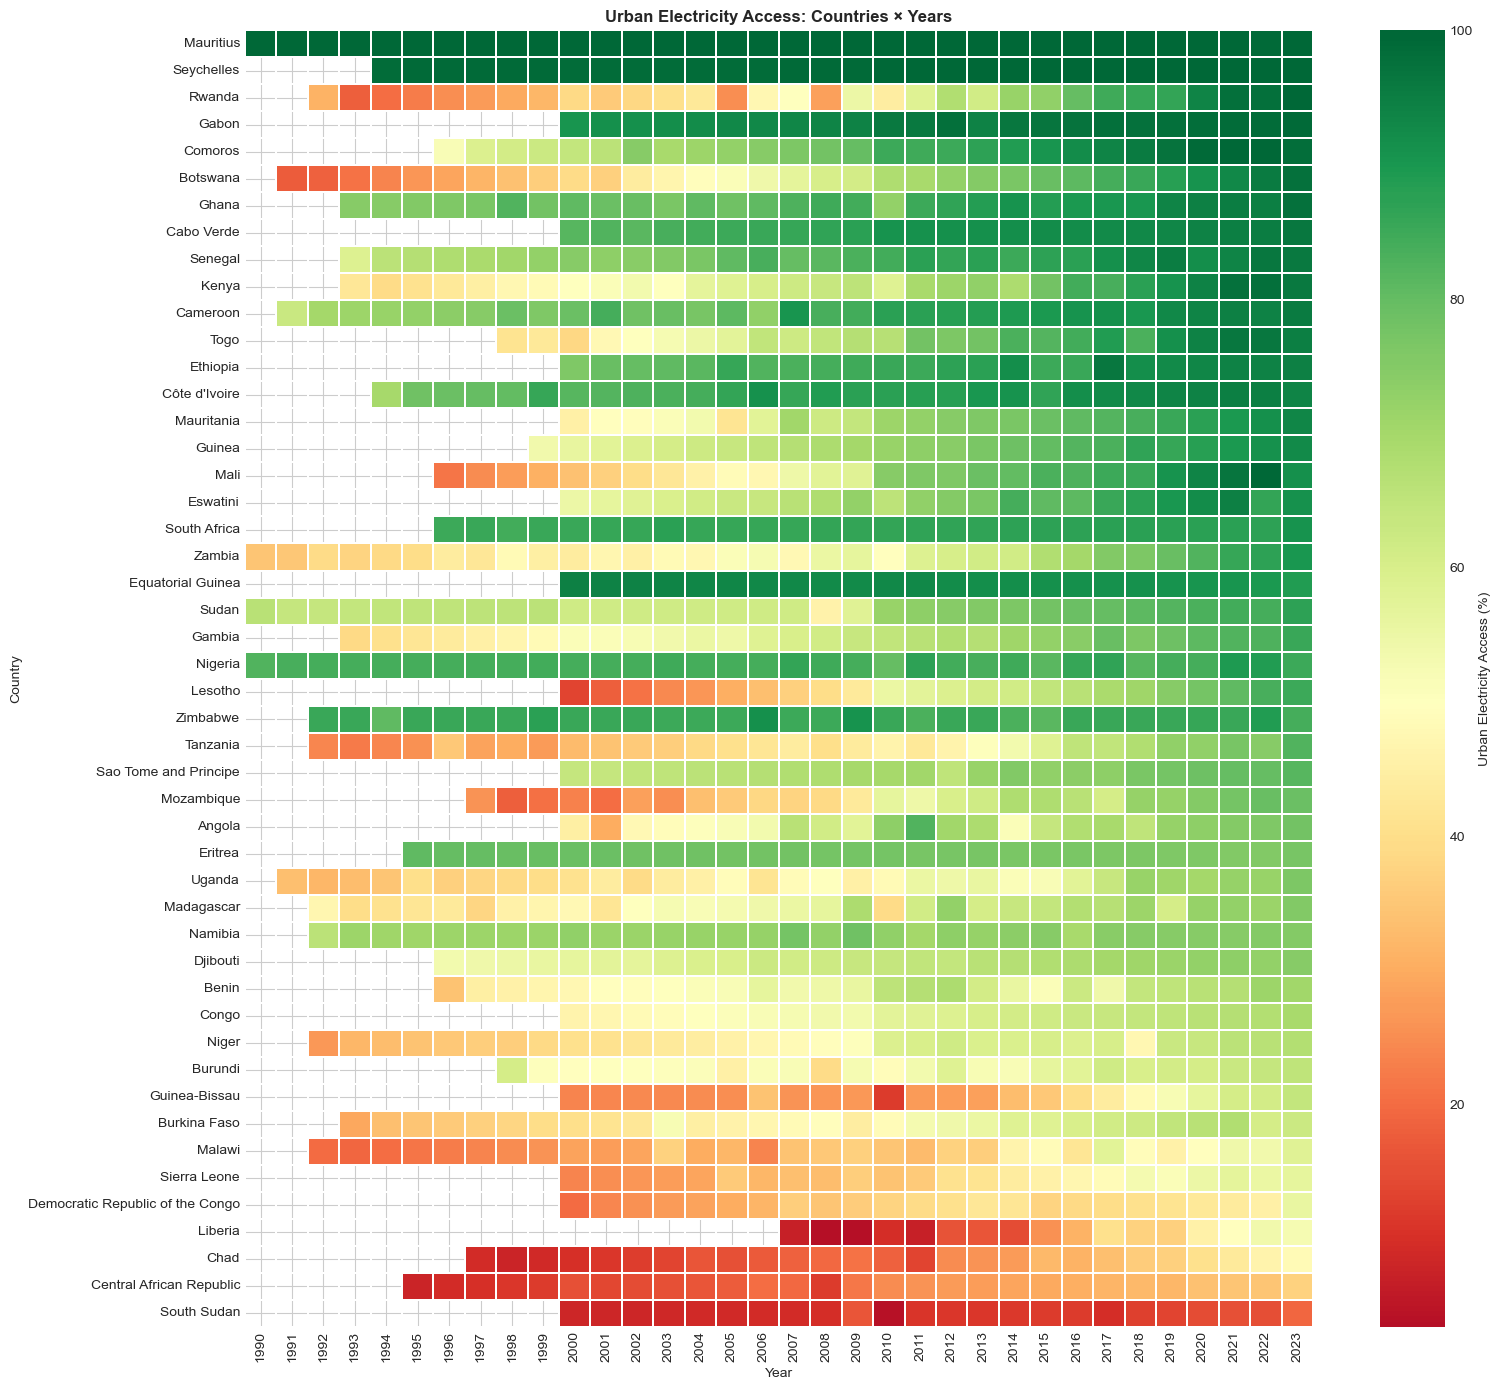

In [11]:
# Heatmap: Countries x Years
pivot_data = df_ssa.pivot(index='Country', columns='Year', values='Urban_Electricity')
pivot_data = pivot_data.sort_values(by=latest_year, ascending=False)

fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(pivot_data, cmap='RdYlGn', center=50, linewidths=0.1, 
            cbar_kws={'label': 'Urban Electricity Access (%)'}, ax=ax)
ax.set_title('Urban Electricity Access: Countries × Years', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')

plt.tight_layout()
plt.savefig('../csv/urban_elec_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Heatmap Shows (Plain Language)

- Each **row** is a country, each **column** is a year
- **Green** = high electricity access (good)
- **Yellow** = medium access
- **Red** = low access (poor)
- **White/blank** = no data available
- Countries at the **top** have the best urban electricity access

---
# 5. Country Comparison <a id='5-countries'></a>

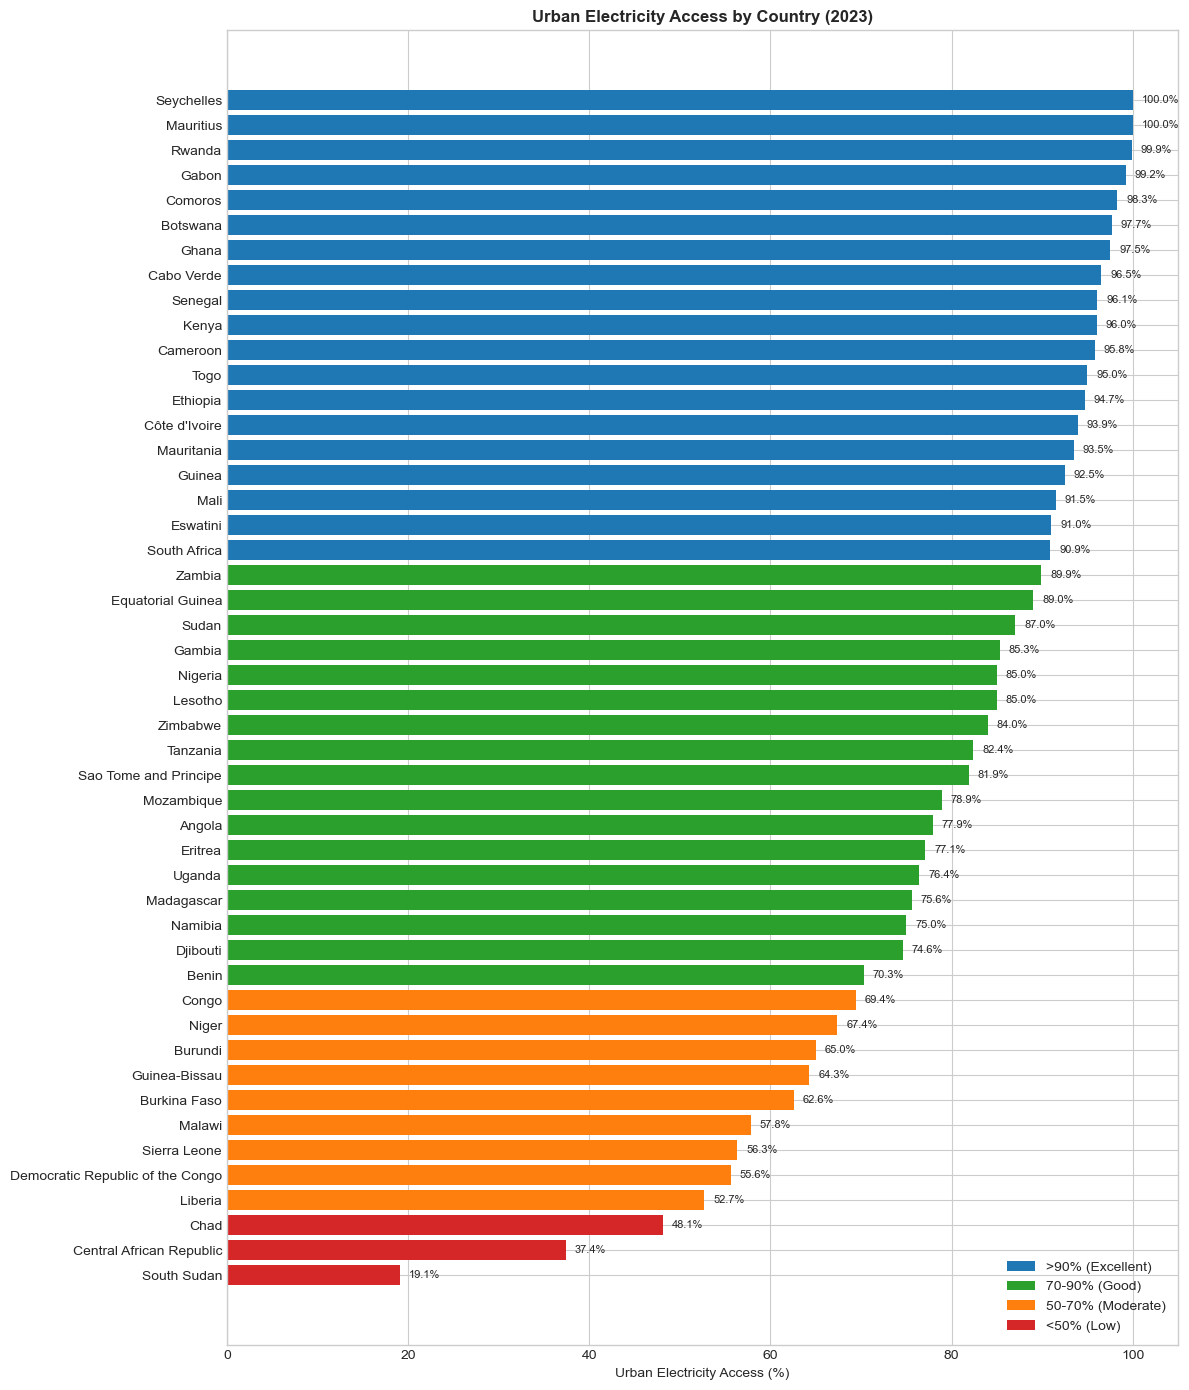

In [12]:
# Country ranking for latest year
country_latest = df_latest.groupby('Country')['Urban_Electricity'].mean().sort_values(ascending=True)

# Color by access level
colors = ['#d62728' if v < 50 else '#ff7f0e' if v < 70 else '#2ca02c' if v < 90 else '#1f77b4' for v in country_latest.values]

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(country_latest.index, country_latest.values, color=colors)
ax.set_xlabel('Urban Electricity Access (%)')
ax.set_title(f'Urban Electricity Access by Country ({latest_year})', fontweight='bold')
ax.set_xlim(0, 105)

# Add value labels
for i, (country, val) in enumerate(country_latest.items()):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=8)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='>90% (Excellent)'),
    Patch(facecolor='#2ca02c', label='70-90% (Good)'),
    Patch(facecolor='#ff7f0e', label='50-70% (Moderate)'),
    Patch(facecolor='#d62728', label='<50% (Low)')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../csv/urban_elec_country_ranking.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Chart Shows (Plain Language)

- Each bar represents one country
- Longer bars = higher urban electricity access
- **Blue bars**: Excellent (>90%)
- **Green bars**: Good (70-90%)
- **Orange bars**: Moderate (50-70%)
- **Red bars**: Low (<50%)

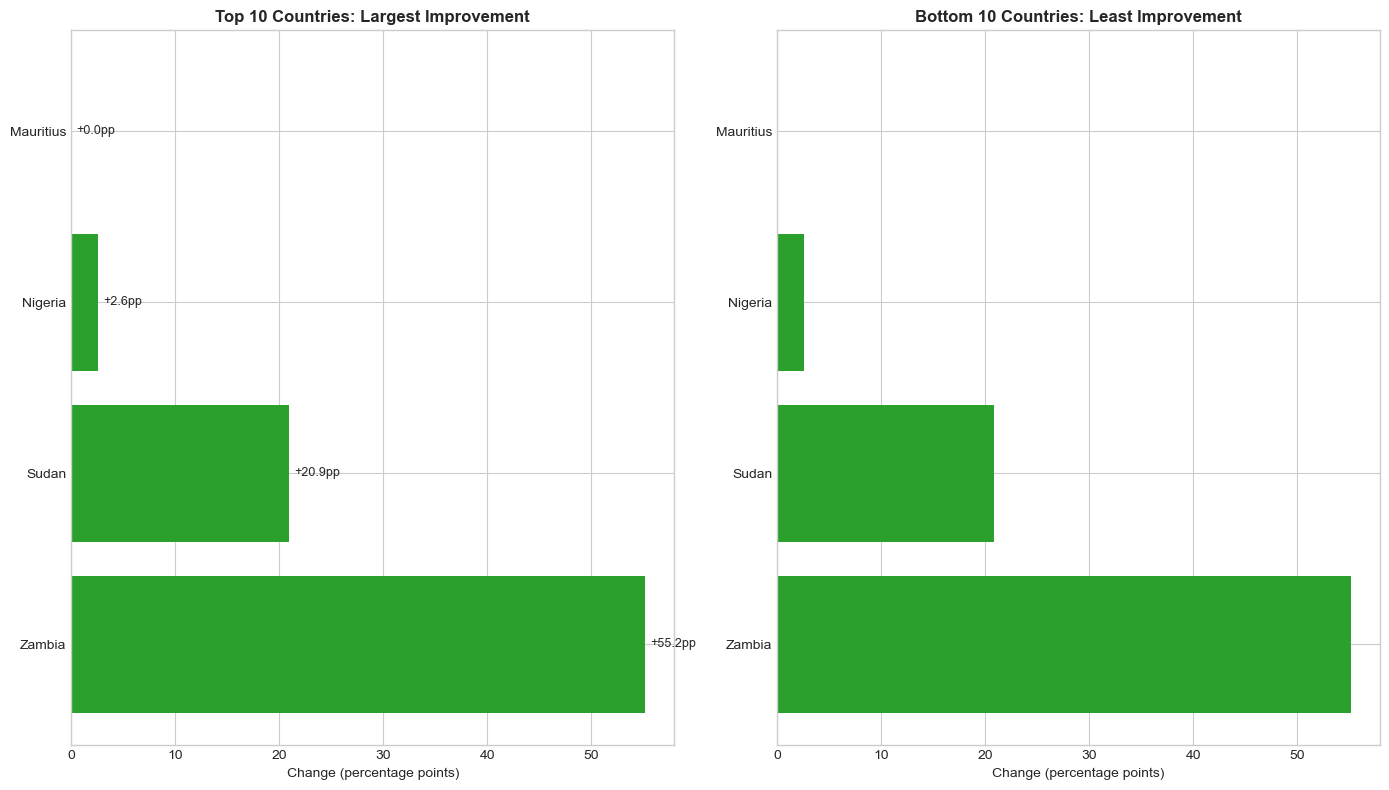

In [13]:
# Countries with most improvement
first_year_data = df_valid[df_valid['Year'] == df_valid['Year'].min()].set_index('Country')['Urban_Electricity']
last_year_data = df_valid[df_valid['Year'] == df_valid['Year'].max()].set_index('Country')['Urban_Electricity']

change = (last_year_data - first_year_data).dropna().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Top improvers
ax1 = axes[0]
top_10 = change.head(10)
colors1 = ['#2ca02c' if v > 0 else '#d62728' for v in top_10.values]
ax1.barh(top_10.index, top_10.values, color=colors1)
ax1.set_xlabel('Change (percentage points)')
ax1.set_title('Top 10 Countries: Largest Improvement', fontweight='bold')
for i, (country, val) in enumerate(top_10.items()):
    ax1.text(val + 0.5, i, f'+{val:.1f}pp', va='center', fontsize=9)

# Least improvement
ax2 = axes[1]
bottom_10 = change.tail(10)
colors2 = ['#2ca02c' if v > 0 else '#d62728' for v in bottom_10.values]
ax2.barh(bottom_10.index, bottom_10.values, color=colors2)
ax2.set_xlabel('Change (percentage points)')
ax2.set_title('Bottom 10 Countries: Least Improvement', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/urban_elec_improvement.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Chart Shows (Plain Language)

- **Left chart**: Countries that improved the most in urban electricity access
- **Right chart**: Countries that improved the least
- Green bars = improvement, Red bars = decline

---
# 6. Key Findings <a id='6-findings'></a>

In [14]:
# Compile key findings
print("=" * 60)
print("KEY FINDINGS: URBAN ELECTRICITY ACCESS IN SSA")
print("=" * 60)

print(f"\n1. CURRENT STATE ({latest_year})")
print(f"   - SSA Average: {df_latest['Urban_Electricity'].mean():.1f}%")
print(f"   - Median: {df_latest['Urban_Electricity'].median():.1f}%")
print(f"   - Range: {df_latest['Urban_Electricity'].min():.1f}% - {df_latest['Urban_Electricity'].max():.1f}%")

print(f"\n2. HISTORICAL CHANGE")
print(f"   - Start ({first_year}): {first_val:.1f}%")
print(f"   - End ({last_year}): {last_val:.1f}%")
print(f"   - Total change: +{last_val - first_val:.1f} percentage points")

print(f"\n3. COUNTRY RANKINGS ({latest_year})")
print(f"   - Countries with >90% urban access: {(df_latest['Urban_Electricity'] > 90).sum()}")
print(f"   - Countries with <50% urban access: {(df_latest['Urban_Electricity'] < 50).sum()}")

print(f"\n4. TOP PERFORMERS")
top_5 = country_latest.tail(5)
for country, val in top_5.items():
    print(f"   - {country}: {val:.1f}%")

print(f"\n5. DATA QUALITY")
print(f"   - Total data points: {len(df_ssa)}")
print(f"   - Missing values: {df_ssa['Urban_Electricity'].isna().sum()} ({df_ssa['Urban_Electricity'].isna().sum()/len(df_ssa)*100:.1f}%)")

KEY FINDINGS: URBAN ELECTRICITY ACCESS IN SSA

1. CURRENT STATE (2023)
   - SSA Average: 80.2%
   - Median: 85.0%
   - Range: 19.1% - 100.0%

2. HISTORICAL CHANGE
   - Start (1990): 70.8%
   - End (2023): 80.2%
   - Total change: +9.4 percentage points

3. COUNTRY RANKINGS (2023)
   - Countries with >90% urban access: 19
   - Countries with <50% urban access: 3

4. TOP PERFORMERS
   - Comoros: 98.3%
   - Gabon: 99.2%
   - Rwanda: 99.9%
   - Mauritius: 100.0%
   - Seychelles: 100.0%

5. DATA QUALITY
   - Total data points: 1632
   - Missing values: 276 (16.9%)


## Summary (Plain Language)

### What We Learned

1. **Urban electricity access is relatively high**: Most cities in Sub-Saharan Africa have better electricity access than rural areas.

2. **Access is improving**: Over the study period, urban electricity access has increased across the region.

3. **Big differences between countries**: Some countries have nearly 100% urban electricity access, while others are still below 50%.

### Data Limitations

- Some countries have missing data
- National averages may hide differences within cities
- Data shows percentages only, not quality of electricity service

---

*Data Source: World Bank WDI (EG.ELC.ACCS.UR.ZS)*